In [12]:
import os
os.chdir("C:/Users/Sristi/Documents/R/data")
os.getcwd()

'C:\\Users\\Sristi\\Documents\\R\\data'

In [13]:
import pandas as pd

In [14]:
df_insurance=pd.read_csv("SBI_Life_insurance.csv", sep=",")

In [15]:
df_insurance

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


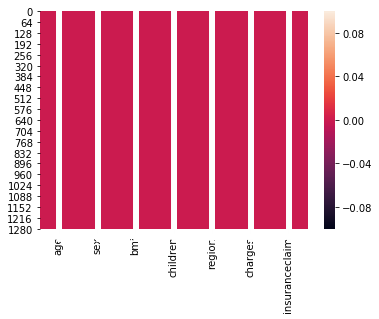

In [43]:
#Heatmap visualization to check null values
sns.heatmap(df_insurance.isnull(),annot=True)
plt.show()

In [18]:
#Check null values without visualization
df_insurance.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [19]:
#To check outliers
from scipy.stats import zscore
z_score=abs(zscore(df_insurance))
print(df_insurance.shape)

(1338, 8)


In [20]:
df_insurance_znew=df_insurance.loc[(z_score<3).all(axis=1)]
print(df_insurance_znew.shape)

(1309, 8)


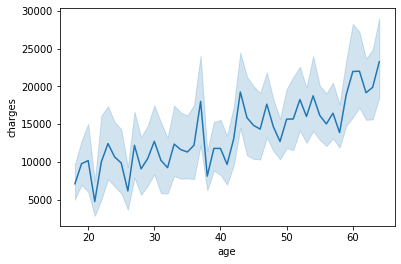

In [21]:
#Lineplot to show charges w.r.t age
sns.lineplot(x=df_insurance["age"], y=df_insurance["charges"], data=df_insurance)
plt.show()
#We see below, insurance charge increasing with age

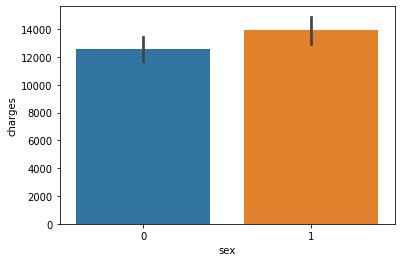

In [22]:
#barplot to check charges w.r.t. sex
sns.barplot(x=df_insurance["sex"], y=df_insurance["charges"], data=df_insurance)
plt.show()

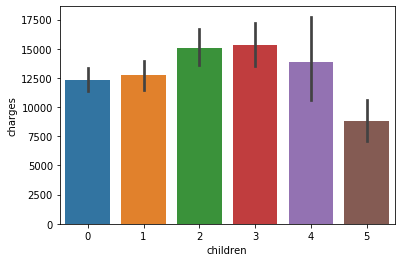

In [23]:
#To check the insurance charges for children of different category
sns.barplot(x=df_insurance["children"], y=df_insurance["charges"], data=df_insurance)
plt.show()

In [24]:
#to check skewness
df_insurance.skew()
#Skewness is not acceptable for few parameters

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

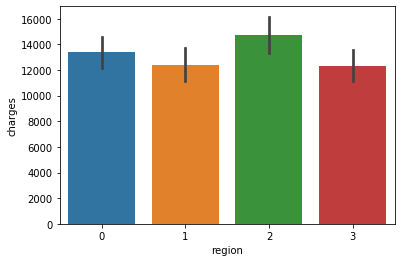

In [25]:
#Charges w.r.t region
sns.barplot(x=df_insurance["region"], y=df_insurance["charges"], data=df_insurance)
plt.show()

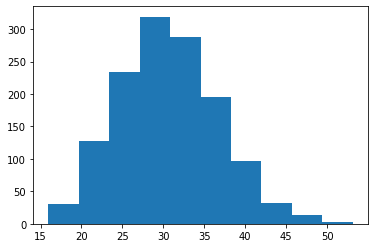

In [26]:
plt.hist(x="bmi", bins=10, data=df_insurance)
plt.show()

In [27]:
df_insurance.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [28]:
df_insurance.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


In [29]:
df_insurance.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [30]:
#Treating Skewness
import numpy as np
for col in df_insurance.columns:
    if df_insurance.skew().loc[col]>0.55:
        df_insurance[col]=np.log1p(df_insurance[col])

In [31]:
df_insurance.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.264083
smoker            1.464766
region           -0.038101
charges          -0.089817
insuranceclaim   -0.346254
dtype: float64

In [32]:
#Still skewness for column Smoker is 1.We can drop the column
df_insurance.drop("smoker", axis=1, inplace=True)

In [33]:
df_insurance

,age,sex,bmi,children,region,charges,insuranceclaim
0,19,0,27.900,0.000000,3,9.734236,1
1,18,1,33.770,0.693147,2,7.453882,1
2,28,1,33.000,1.386294,2,8.400763,0
3,33,1,22.705,0.000000,1,9.998137,0
4,32,1,28.880,0.000000,1,8.260455,1
...,...,...,...,...,...,...,...
1333,50,1,30.970,1.386294,1,9.268755,0
1334,18,0,31.920,0.000000,0,7.699381,1
1335,18,0,36.850,0.000000,2,7.396847,1
1336,21,0,25.800,0.000000,3,7.605365,0


In [34]:
#We check Skewness again
df_insurance.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.264083
region           -0.038101
charges          -0.089817
insuranceclaim   -0.346254
dtype: float64

In [35]:
#Defining input and output variable for linear regression
x=df_insurance[["age"]]
y=df_insurance[["charges"]]

In [36]:
#Scaling because we removed outliers
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.43876426],
       [-1.50996545],
       [-0.79795355],
       ...,
       [-1.50996545],
       [-1.29636188],
       [ 1.55168573]])

In [37]:
#r2 score calculation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = r_state,test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
    print()
    print()
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42  is:  0.3375820529595136


max r2 score corresponding to  42  is  0.3375820529595136
r2_score corresponding to random state:  43  is:  0.163162916330438


max r2 score corresponding to  42  is  0.3375820529595136
r2_score corresponding to random state:  44  is:  0.22793352272731504


max r2 score corresponding to  42  is  0.3375820529595136
r2_score corresponding to random state:  45  is:  0.3043189520444767


max r2 score corresponding to  42  is  0.3375820529595136
r2_score corresponding to random state:  46  is:  0.23643690621642244


max r2 score corresponding to  42  is  0.3375820529595136
r2_score corresponding to random state:  47  is:  0.29391201406967415


max r2 score corresponding to  42  is  0.3375820529595136
r2_score corresponding to random state:  48  is:  0.35404445876732904


max r2 score corresponding to  48  is  0.35404445876732904
r2_score corresponding to random state:  49  is:  0.3508425039732376


max r2 score correspon

In [38]:
#Above output shows acceptable r2 score in most cases and maximum score is also displayed.

In [39]:
#Cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(), x, y, cv=5,scoring= "r2").mean()
#below cross validation score is very less and model needs more improvement

0.2751018088465768

In [40]:
#maximum r2 score corresponds to random state 53. So we use it for final model.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 53,test_size=0.20)
lr = linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)


In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.42279425408152616
RMSE is :  0.7145731760386113


In [42]:
!pip install joblib
from sklearn.externals import joblib
joblib.dump(lr, "lr_SBILifeinsurance.pkl")

['lr_SBILifeinsurance.pkl']